In [151]:
import torch
from matplotlib import pyplot as plt
from efficient_kan import KANLinear
layer = KANLinear(28*28, 128128,, 10)

In [131]:
# get b-spline basis (thx to efficient_kan)
x = torch.linspace(-3, 3, 28*28)
basis = layer.b_splines(x[None])
print(layer.grid)
print(basis[0, :, 0].max())
print(layer.grid[0][-8])

tensor([[-1.6000, -1.4000, -1.2000,  ...,  1.2000,  1.4000,  1.6000],
        [-1.6000, -1.4000, -1.2000,  ...,  1.2000,  1.4000,  1.6000],
        [-1.6000, -1.4000, -1.2000,  ...,  1.2000,  1.4000,  1.6000],
        ...,
        [-1.6000, -1.4000, -1.2000,  ...,  1.2000,  1.4000,  1.6000],
        [-1.6000, -1.4000, -1.2000,  ...,  1.2000,  1.4000,  1.6000],
        [-1.6000, -1.4000, -1.2000,  ...,  1.2000,  1.4000,  1.6000]])
tensor(0.6667)
tensor(0.2000)


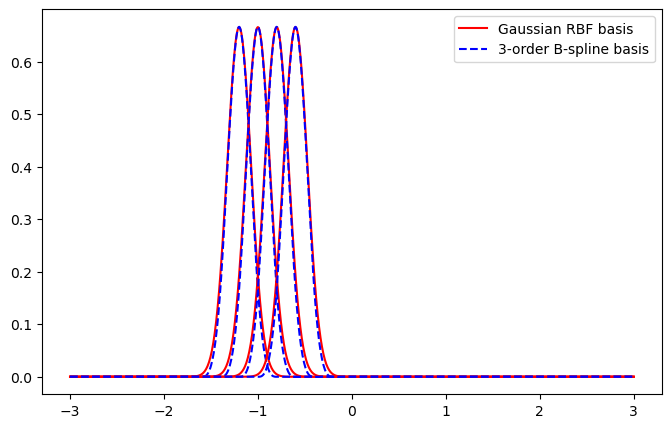

In [152]:
# calculate radial basis functions with gaussian density kernel
def rbf(x, grid, h):
    return torch.exp(-((x[..., None] - grid) / h)  ** 2 )
rbf_basis = rbf(x, torch.linspace(layer.grid[0][2], layer.grid[0][-16+7], 7), 0.18)
rbf_basis.shape
fig = plt.figure(figsize=(8, 5))
ax = fig.subplots(1, 1)
for i in range(4):
    rbf_plt = ax.plot(x.numpy(), rbf_basis[:, i].numpy() * .6661, color="red", label=None if i > 0 else "Gaussian RBF basis")
    bspline_plt = ax.plot(x.numpy(), basis[0, :, i].numpy(), "--", color="blue", label=None if i > 0 else "3-order B-spline basis")
ax.legend()
fig.savefig("img/compare_basis.png", dpi=100)

Conclusion: Gaussian Radial Basis Functions can well approximate 3-order B-Spline basis with linear scalings.